In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,train_test_split,KFold
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,RepeatedKFold,GridSearchCV
from sklearn.metrics import mean_absolute_error,r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
def AARE(y_actual,y_pred):
    aare = np.mean(abs((y_pred - y_actual) / y_actual)) * 100
    return aare

In [3]:
data = pd.read_csv('dynamic_holdup.csv')
data = data.dropna()
data.shape

(416, 12)

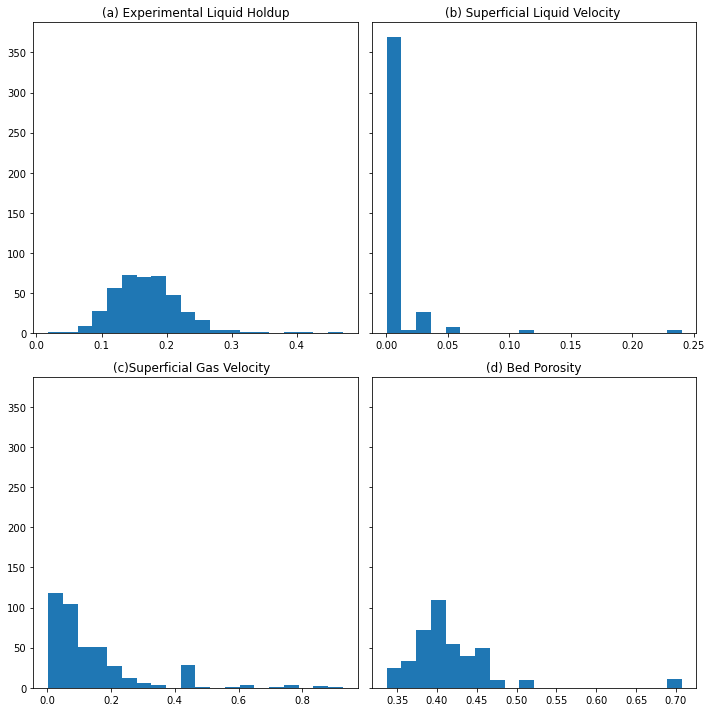

In [4]:
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True,figsize=(10,10))
n_bins = 20

axs[0,0].hist(data['Liquid Holdup '], bins=n_bins)
axs[0,0].set_title('(a) Experimental Liquid Holdup')
axs[0,1].hist(data['Superficial Liquid Velocity '], bins=n_bins)
axs[0,1].set_title('(b) Superficial Liquid Velocity ')
axs[1,0].hist(data['Superficial Gas Velocity '], bins=n_bins)
axs[1,0].set_title('(c)Superficial Gas Velocity  ')
axs[1,1].hist(data['Bed Porosity'], bins=n_bins)
axs[1,1].set_title('(d) Bed Porosity')
plt.show()

In [5]:
X,y = data.iloc[:,:-1],data.iloc[:,-1]

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)


In [7]:
X_train, X_test,y_train, y_test = train_test_split(X_scaled,y ,test_size=0.2,random_state =42)

## Linear Regression

In [8]:
reg = LinearRegression()
kfold_cv = KFold(n_splits=10,random_state=42,shuffle=True)
y_pred_cv = cross_val_predict(reg,X_train,y_train,cv=kfold_cv)

print("r-sqr = ",r2_score(y_train,y_pred_cv))
print("MAE = ",mean_absolute_error(y_train,y_pred_cv))
print("AARE = ",AARE(y_train,y_pred_cv))

r-sqr =  0.33853304552122865
MAE =  0.02936193126294155
AARE =  21.1369146567618


In [9]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

print("r-sqr = ",r2_score(y_test,y_pred))
print("MAE = ",mean_absolute_error(y_test,y_pred))
print("AARE = ",AARE(y_test,y_pred))

r-sqr =  0.15957120901940314
MAE =  0.03316516804493696
AARE =  19.96427029456853


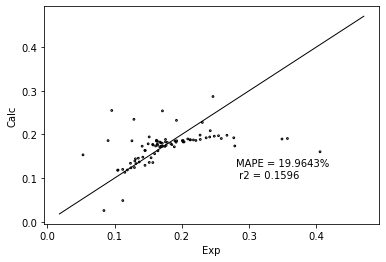

In [10]:
plt.scatter(y_test,y_pred,marker='o',facecolors='none', edgecolors='k',s=3)
plt.plot([np.min(y), np.max(y)], [np.min(y), np.max(y)],'k-', lw=1)
plt.xlabel('Exp')
plt.ylabel('Calc')
plt.text(0.28, .1,"MAPE = {:.4f}% \n r2 = {:.4f}".format(AARE(y_test,y_pred),r2_score(y_test,y_pred)))
plt.show()

## GBR

In [11]:
reg = GradientBoostingRegressor(loss='huber', max_depth=6, max_features='sqrt',
                          min_samples_split=4, n_estimators=200,random_state=42)
kfold_cv = KFold(n_splits=10,random_state=42,shuffle=True)
y_pred_cv = cross_val_predict(reg,X_train,y_train,cv=kfold_cv)

print("r-sqr = ",r2_score(y_train,y_pred_cv))
print("MAE = ",mean_absolute_error(y_train,y_pred_cv))
print("AARE = ",AARE(y_train,y_pred_cv))


r-sqr =  0.7579182932772617
MAE =  0.01028797726386106
AARE =  6.038723373573161


In [12]:
reg = GradientBoostingRegressor(loss='huber', max_depth=6, max_features='sqrt',
                          min_samples_split=4, n_estimators=200,random_state=42)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

print("r-sqr = ",r2_score(y_test,y_pred))
print("MAE = ",mean_absolute_error(y_test,y_pred))
print("AARE = ",AARE(y_test,y_pred))

r-sqr =  0.8971981042747906
MAE =  0.009721614526411427
AARE =  5.3417830791731316


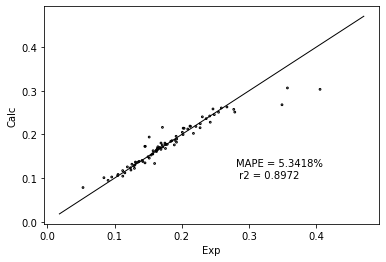

In [13]:
plt.scatter(y_test,y_pred,marker='o',facecolors='none', edgecolors='k',s=3)
plt.plot([np.min(y), np.max(y)], [np.min(y), np.max(y)],'k-', lw=1)
plt.xlabel('Exp')
plt.ylabel('Calc')
plt.text(0.28, .1,"MAPE = {:.4f}% \n r2 = {:.4f}".format(AARE(y_test,y_pred),r2_score(y_test,y_pred)))
plt.show()

# For selected features

In [14]:
top_selected_features = ['Superficial Liquid Velocity ',
                         'Superficial Gas Velocity ',
                         'Bed Porosity',
                         'Particle diameter',
                         'Density of liquid',
                         'Viscosity of gas']

In [15]:
X_selected_features = X_scaled[top_selected_features]

In [16]:
X_train, X_test,y_train, y_test = train_test_split(X_selected_features,y ,test_size=0.2,random_state =42)

In [17]:
reg = GradientBoostingRegressor(loss='huber', max_depth=4, max_features='sqrt',
                          min_samples_split=4, n_estimators=200,random_state=42)
kfold_cv = KFold(n_splits=10,random_state=42,shuffle=True)
y_pred_cv = cross_val_predict(reg,X_train,y_train,cv=kfold_cv)

print("r-sqr = ",r2_score(y_train,y_pred_cv))
print("MAE = ",mean_absolute_error(y_train,y_pred_cv))
print("AARE = ",AARE(y_train,y_pred_cv))


r-sqr =  0.8380117718497131
MAE =  0.009157007260480063
AARE =  5.112670244249207


In [18]:
reg = GradientBoostingRegressor(loss='huber', max_depth=4, max_features='sqrt',
                          min_samples_split=4, n_estimators=200,random_state=42)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

print("r-sqr = ",r2_score(y_test,y_pred))
print("MAE = ",mean_absolute_error(y_test,y_pred))
print("AARE = ",AARE(y_test,y_pred))

r-sqr =  0.8689421276669341
MAE =  0.011247497263603528
AARE =  5.979927455631836


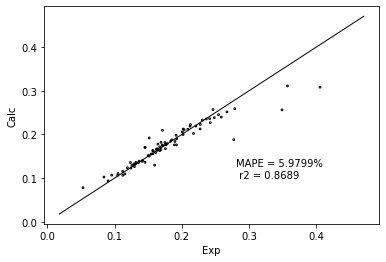

In [19]:
plt.scatter(y_test,y_pred,marker='o',facecolors='none', edgecolors='k',s=3)
plt.plot([np.min(y), np.max(y)], [np.min(y), np.max(y)],'k-', lw=1)
plt.xlabel('Exp')
plt.ylabel('Calc')
plt.text(0.28, .1,"MAPE = {:.4f}% \n r2 = {:.4f}".format(AARE(y_test,y_pred),r2_score(y_test,y_pred)))
plt.show()